Assignment 3

In [1]:
import math

import matplotlib.pyplot
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Import and load the built-in diabetes dataset and split it into the testing and training sets.

In [2]:
diabetes = load_diabetes()
diabetes_training_x, diabetes_testing_x, diabetes_training_y, diabetes_testing_y = train_test_split(diabetes['data'],
                                                                                                    diabetes['target'],
                                                                                                    random_state=3001)
print(diabetes.DESCR)  #Examine the labels and find out information about the dataset
print(diabetes.feature_names)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Import the data for the normalised diabetes dataset from the file.

In [3]:
diabetes_data = np.genfromtxt("diabetes.data", delimiter="\t", skip_header=1, usecols=np.arange(0, 10))
# The file has a header at the top of it we must skip over it
diabetes_label = np.genfromtxt("diabetes.data", skip_header=1, usecols=10)

Split the data that was imported from the file into the training and testing sets.

In [4]:
new_diabetes_training_x, new_diabetes_testing_x, new_diabetes_training_y, new_diabetes_testing_y = train_test_split(
    diabetes_data, diabetes_label, random_state=3001)

Write a function that returns the count of items that are non-zero.

In [5]:
def sum0(lst):
    counter = 0
    for i in lst:
        if i != 0:
            counter = counter + 1
    return counter

Compute the coefficient of determination for the lasso. Residual sum of squares / total sum of squares. And the number of features used (the number of non-zero coefficients). This is for the built-in dataset.

In [6]:
training_score = Lasso.score(Lasso().fit(diabetes_training_x, diabetes_training_y), diabetes_training_x,
                             diabetes_training_y, sample_weight=None)
testing_score = Lasso.score(Lasso().fit(diabetes_training_x, diabetes_training_y), diabetes_testing_x,
                            diabetes_testing_y,
                            sample_weight=None)
print("Training R squared for lasso using built-in dataset:")
print(training_score)
print("Testing R squared for lasso using built-in dataset:")
print(testing_score)
print("Number of features used for built-in dataset:")
print(sum0(Lasso().fit(diabetes_training_x, diabetes_training_y).coef_))

Training R squared for lasso using built-in dataset:
0.3415823818772673
Testing R squared for lasso using built-in dataset:
0.34648460027308603
Number of features used for built-in dataset:
3


Compute the same thing for the imported dataset.

In [7]:
lasso = Lasso()
lasso.fit(new_diabetes_training_x, new_diabetes_training_y)
new_training_score = lasso.score(new_diabetes_training_x, new_diabetes_training_y)
new_testing_score = lasso.score(new_diabetes_testing_x, new_diabetes_testing_y)
print("Training R squared for lasso with the loaded dataset:")
print(new_training_score)
print("Testing R squared for lasso with the loaded dataset:")
print(new_testing_score)
print("Number of features used:")
print(sum0(lasso.coef_))

Training R squared for lasso with the loaded dataset:
0.5014454691934784
Testing R squared for lasso with the loaded dataset:
0.5075116561219993
Number of features used:
10


In [8]:
new_value = StandardScaler()
new_value.fit(new_diabetes_training_x)
new_norm_diabetes_training_x = new_value.transform(new_diabetes_training_x)
new_norm_diabetes_testing_x = new_value.transform(new_diabetes_testing_x)
print("Normalised data set traning R2:")
print(Lasso().fit(new_norm_diabetes_training_x, new_diabetes_training_y).score(new_norm_diabetes_training_x,
                                                                               new_diabetes_training_y))
print("Normalised data set testing R2:")
new_value.fit(new_diabetes_testing_x)
print(Lasso().fit(new_norm_diabetes_training_x, new_diabetes_training_y).score(new_norm_diabetes_testing_x,
                                                                               new_diabetes_testing_y))

Normalised data set traning R2:
0.5042980859207147
Normalised data set testing R2:
0.5156886801861563


In [9]:
values = []
alphas = []
cross = []
for i in range(0, 5000, 1):
    lasso = Lasso(alpha=(i + 1) / 100)
    lasso.fit(diabetes_training_x, diabetes_training_y)
    temp = cross_validate(lasso, diabetes_training_x, diabetes_training_y)
    values.append(np.sum(temp['test_score']) / len(temp['test_score']))
    alphas.append((i + 1) / 100)

Loop over the data using lots of alphas to try and see how the graph will look. Use a small interval so that we can easily find the number of features used.

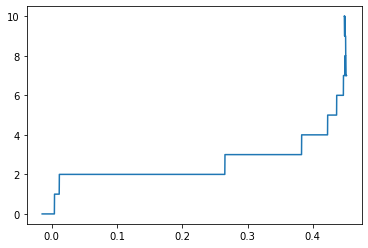

In [10]:
values = []
totals = []
alphas = []
cross = []
for i in range(0, 5000, 1):
    lasso = Lasso(alpha=(i + 1) / 100)
    lasso.fit(new_norm_diabetes_training_x, new_diabetes_training_y)
    temp = cross_validate(lasso, new_norm_diabetes_training_x, new_diabetes_training_y)
    values.append(np.sum(temp['test_score']) / len(temp['test_score']))
    alphas.append((i + 1) / 100)
    totals.append(
        sum0(Lasso(alpha=(i + 1) / 100).fit(new_norm_diabetes_training_x, new_diabetes_training_y).coef_))
matplotlib.pyplot.plot(values, totals, marker=None)

We can compute the number of features that influence the dataset.
In addition, we are also able to compute the optimum value for alpha since we used a very small incremental change for alpha.
If we use a smaller incremental value for alpha we are able to compute a closer value.

In [11]:
unique = []
for i in set(totals):
    unique.append(i)
new_points = []
for i in range(0, len(unique)):
    for j in range(0, len(totals)):
        if unique[i] == totals[j]:
            new_points.append(values[j])
            break
increasing_points = 1
index = 0
for i in range(0, len(new_points) - 1):  #Count the number of points that increase
    if new_points[i] < new_points[i + 1]:
        index = i
        increasing_points = increasing_points + 1
feature = np.sum(
    Lasso(alpha=alphas[np.argmax(values)]).fit(new_norm_diabetes_training_x, new_diabetes_training_y).coef_ != 0)

In [12]:
print("Number of features required:")
print(increasing_points)
index = np.argmax(values)
print("Optimal alpha found:")
al = {'alpha': alphas}
grid_search = GridSearchCV(Lasso(), al)
grid_search.fit(new_norm_diabetes_training_x, new_diabetes_training_y)
print(grid_search.score(new_norm_diabetes_testing_x, diabetes_testing_y))
print("Optimal R2 value found:")
print(grid_search.score(new_norm_diabetes_training_x, new_diabetes_training_y))

Number of features required:
8
Optimal alpha found:
0.5139722640060603
Optimal R2 value found:
0.5018016530986229


An interesting observation is that we now have a higher R2 with the more optimal alpha.

From this graph we can compute that there are seven distinctive values where it increases. So, we should isolate these and plot a graph that shows this. This will give us the best curve possible.

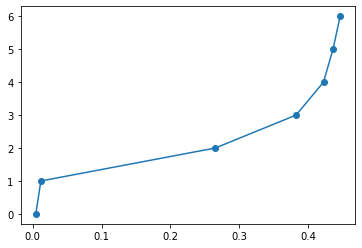

In [13]:
matplotlib.pyplot.plot(new_points[0:increasing_points - 1], unique[0:increasing_points - 1], marker="o")

Split the dataset again but in the specified way for the calibration set.

In [14]:
proper_training_x, calibration_x, proper_training_y, calibration_y = train_test_split(new_diabetes_training_x,
                                                                                      new_diabetes_training_y,
                                                                                      random_state=3001, test_size=99)

Run the standard scaler to normalise the data from the newly split calibration and testing set.

In [15]:
scale = StandardScaler()
scale.fit(proper_training_x)
norm_x = scale.transform(proper_training_x)
calibrated_x = scale.transform(calibration_x)
testing_x = scale.transform(new_diabetes_testing_x)

Compute and output the non-conformity scores.

In [16]:
lasso_proper = Lasso().fit(norm_x, proper_training_y)
testing_y_hat = grid_search.predict(new_norm_diabetes_testing_x)
y_hat = lasso_proper.predict(calibrated_x)
not_conform = abs(calibration_y - y_hat)
not_conform = np.sort(not_conform)
print(not_conform)

[  0.20574376   0.81448209   1.11265962   1.37076657   2.63572638
   2.7583597    3.69333904   4.82084263   5.58952029   7.08692956
   7.48521118   9.26595815   9.93327029  10.07031841  10.20990403
  13.28994026  13.52374718  14.80203832  15.45284982  16.33196162
  16.54610721  16.90835514  17.05279841  17.87257688  19.44145401
  19.66101259  20.08555074  21.5863411   23.94493448  23.94737749
  24.2257222   24.48055092  25.38628155  26.00503312  26.18579373
  28.86666613  31.07655584  31.8590903   32.39755315  32.93236613
  32.96933788  34.72538808  34.74803692  35.07927207  38.52215602
  39.40434315  39.44823907  40.60709078  41.69578027  41.73017458
  42.36386215  42.68546726  44.44337919  46.05901831  46.48474391
  46.73957059  48.52570571  48.54097266  49.06426162  51.32523518
  53.01816324  55.46340404  56.29374648  56.352054    56.66846264
  58.23870544  60.40411272  63.74164804  64.5299164   65.31299746
  67.95027261  68.38725449  69.46999242  71.75828268  73.612727
  73.7377993

Compute the interval for a given percentage by defining an interval function that takes a percentage and returns the interval.

In [17]:
def interval(percentage):
    return not_conform[len(not_conform) - int(math.floor(percentage / 100 * (len(not_conform) + 1)))]
print("Length of prediction interval at 5%:")
print(interval(5))
print("Length of prediction interval at 20%:")
print(interval(20))

Length of prediction interval at 5%:
118.23137397423886
Length of prediction interval at 20%:
79.00018018564666


Calculate the error rate by counting the number of items which are over the interval value.

In [18]:
def error_calc(val):
    counter = 1
    for i in range(0, diabetes_testing_y.size):
        if abs(diabetes_testing_y[i] - testing_y_hat[i]) > interval(val):
            counter = counter + 1
    return counter / int(new_diabetes_testing_y.size)
print("Error rate at 5%:")
print(error_calc(5))
print("Error rate at 20%:")
print(error_calc(20))

Error rate at 5%:
0.018018018018018018
Error rate at 20%:
0.18018018018018017
